<a href="https://colab.research.google.com/github/matusoff/ML_models/blob/main/Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##A Neuro Model for Classification of Diamond Cut Quality.

The zero class will include diamonds with cut quality 1 and 2, the first class will include diamonds with cut quality 3 and 4. The dataset contains 53137 examples. To reduce computational cost  I've downsized the dataset to 5000 instances during processing.

• carat: weight of the diamond in carats,

• color: diamond color,

• clarity: diamond clarity,

• depth: depth of the diamond,

• table: size of the top facet of the diamond,

• price: diamond price,

• observation_point_on_axis_x, observation_point_on_axis_y, observation_point_on_axis_z: observation point coordinates

Target Column:
• cut: the quality of the diamond cut.

• Dataset: https://www.kaggle.com/datasets/ulrikthygepedersen/diamonds

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset("mstz/diamonds", "cut")["train"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for mstz/diamonds contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mstz/diamonds
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.war

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
print(dataset[:5])


{'carat': [0.23000000417232513, 0.20999999344348907, 0.23000000417232513, 0.28999999165534973, 0.3100000023841858], 'color': ['E', 'E', 'E', 'I', 'J'], 'clarity': [6.0, 5.0, 3.0, 4.0, 6.0], 'depth': [61.5, 59.79999923706055, 56.900001525878906, 62.400001525878906, 63.29999923706055], 'table': [55.0, 61.0, 65.0, 58.0, 58.0], 'price': [326.0, 326.0, 327.0, 334.0, 335.0], 'observation_point_on_axis_x': [3.950000047683716, 3.890000104904175, 4.050000190734863, 4.199999809265137, 4.340000152587891], 'observation_point_on_axis_y': [3.9800000190734863, 3.8399999141693115, 4.070000171661377, 4.230000019073486, 4.349999904632568], 'observation_point_on_axis_z': [2.430000066757202, 2.309999942779541, 2.309999942779541, 2.630000114440918, 2.75], 'cut': [4, 3, 1, 3, 1]}


In [ ]:
import pandas as pd

# dataset into DataFrame
df = pd.DataFrame(dataset)
df.head()


,carat,color,clarity,depth,table,price,observation_point_on_axis_x,observation_point_on_axis_y,observation_point_on_axis_z,cut
0,0.23,E,6.0,61.500000,55.0,326.0,3.95,3.98,2.43,4
1,0.21,E,5.0,59.799999,61.0,326.0,3.89,3.84,2.31,3
2,0.23,E,3.0,56.900002,65.0,327.0,4.05,4.07,2.31,1
3,0.29,I,4.0,62.400002,58.0,334.0,4.20,4.23,2.63,3
4,0.31,J,6.0,63.299999,58.0,335.0,4.34,4.35,2.75,1


In [ ]:
# new result_df with each 10th line from df

result_df = df.iloc[::10, :].reset_index(drop=True)

In [ ]:
# replacing values in a column "cut"
result_df['cut'] = result_df['cut'].replace({1: 0, 2: 0, 3: 1, 4: 1})


In [ ]:
# unique colors in "color"
unique_colors = result_df['color'].unique()

unique_colors


array(['E', 'J', 'I', 'F', 'D', 'H', 'G'], dtype=object)

In [ ]:
# creating a matching dictionary
color_mapping = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}

# replacing values to "color"
result_df['color'] = result_df['color'].replace(color_mapping)


In [ ]:
from sklearn.model_selection import train_test_split

X = result_df.drop('cut', axis=1)  # features w/o "cut"
y = result_df['cut']  # target variable

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


print("Train dataset:", x_train.shape, y_train.shape)
print("Test dataset:", x_val.shape, y_val.shape)


Train dataset: (4251, 9) (4251,)
Test dataset: (1063, 9) (1063,)


In [ ]:
# Now let's write a code, where autokeras will select the best neural network for this data for the binary classification task


# !pip install autokeras
import autokeras as ak

# Creating and training a model with 100 epoch
clf = ak.StructuredDataClassifier(max_trials=10)  # The max_trials can be increased for longer search
clf.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100)

accuracy = clf.evaluate(x_val, y_val)[1]
print("Accuracy on validation data:", accuracy)

# Best model
best_model = clf.export_model()

best_model.summary()
best_model.summary(line_length=120)

best_model.save("best_model_autokeras", save_format="tf")


Trial 10 Complete [00h 01m 12s]
val_accuracy: 0.7140169143676758

Best val_accuracy So Far: 0.8015051484107971
Total elapsed time: 00h 21m 25s
Epoch 1/100
133/133 [==============================] - 2s 5ms/step - loss: 0.6082 - accuracy: 0.6780 - val_loss: 0.5749 - val_accuracy: 0.7093
Epoch 2/100
133/133 [==============================] - 0s 3ms/step - loss: 0.5360 - accuracy: 0.7377 - val_loss: 0.5655 - val_accuracy: 0.7121
Epoch 3/100
133/133 [==============================] - 1s 4ms/step - loss: 0.5264 - accuracy: 0.7450 - val_loss: 0.5598 - val_accuracy: 0.7159
Epoch 4/100
133/133 [==============================] - 1s 5ms/step - loss: 0.5224 - accuracy: 0.7466 - val_loss: 0.5575 - val_accuracy: 0.7197
Epoch 5/100
133/133 [==============================] - 1s 6ms/step - loss: 0.5144 - accuracy: 0.7532 - val_loss: 0.5559 - val_accuracy: 0.7206
Epoch 6/100
133/133 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.7586 - val_loss: 0.5531 - val_accuracy: 0.7206

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/best_model_autokeras")


In [ ]:
# prediction on x_val

predictions = model.predict(x_val)
print(predictions)

34/34 [==============================] - 0s 4ms/step
[[0.7787103 ]
 [0.94415647]
 [0.92037237]
 ...
 [0.4934724 ]
 [0.97963566]
 [0.86676544]]


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming your model is a binary or multi-class classifier and outputs logits or probabilities
# Convert probabilities to class labels (e.g., 0 or 1 for binary classification)
predicted_labels = np.argmax(predictions, axis=1)

# Now, calculate the accuracy
accuracy = accuracy_score(y_val, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.35936030103480715


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming predicted_labels are obtained as shown in the previous example
accuracy = accuracy_score(y_val, predicted_labels)
recall = recall_score(y_val, predicted_labels, average='macro')  # Use 'binary' for binary classification
precision = precision_score(y_val, predicted_labels, average='macro')  # Use 'binary' for binary classification
f1 = f1_score(y_val, predicted_labels, average='macro')  # Use 'binary' for binary classification

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)



Accuracy: 0.35936030103480715
Recall: 0.5
Precision: 0.17968015051740358
F1 Score: 0.2643598615916955


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


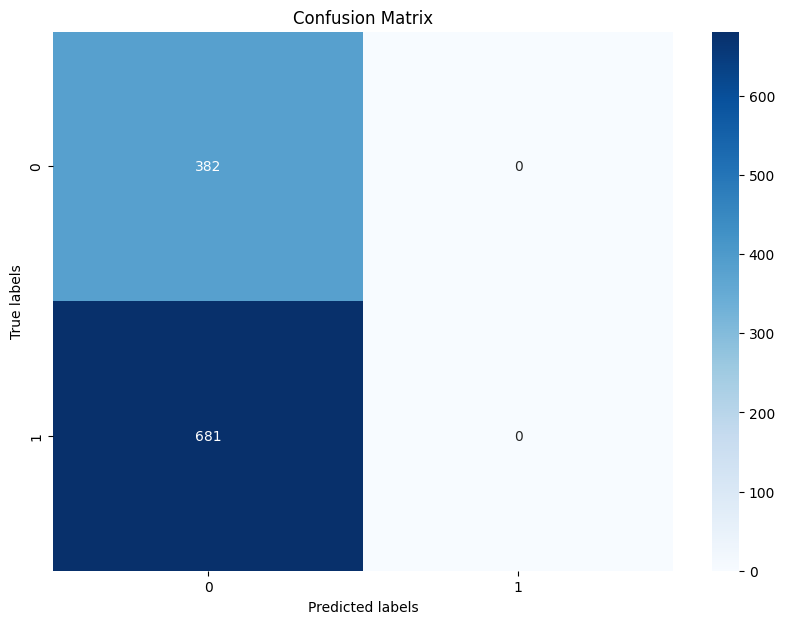

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_val, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
